In [1]:
import pandas as pd
import numpy as mp


In [2]:
data = pd.read_csv('final_filter.csv')
#data
data = data.iloc[mp.random.permutation(len(data))]
print(data)

      location    mean_X    mean_Y    mean_Z     std_X     std_Y     std_Z  \
2586         2 -0.166218  0.741565 -0.274216  0.367640  0.331478  0.432264   
1752         1 -0.031501  0.110551 -0.984593  0.063066  0.080513  0.069576   
3349         3  0.018262  0.513564 -0.854313  0.015786  0.055122  0.044759   
2187         2  0.640187  0.717811  0.170213  0.083785  0.120145  0.173563   
751          1  0.345142  0.737243 -0.434588  0.047831  0.327853  0.252273   
...        ...       ...       ...       ...       ...       ...       ...   
828          1  0.295562  0.557944 -0.602977  0.072749  0.385935  0.268054   
3299         3 -0.059503  0.658273 -0.750939  0.054313  0.081193  0.090754   
138          1  0.131733  0.451024 -0.888145  0.022883  0.040484  0.016916   
3020         3 -0.941485  0.184507 -0.328145  0.455337  0.385626  0.271059   
1724         1 -0.017724  0.156339 -1.006215  0.075337  0.069647  0.075446   

        skew_X    skew_Y    skew_Z  label  
2586 -0.317013 -0.8

In [3]:
dataset = data.values
dataset

array([[ 2.00000000e+00, -1.66217957e-01,  7.41565399e-01, ...,
        -8.25197156e-01,  4.75957645e-01,  2.20000000e+01],
       [ 1.00000000e+00, -3.15008550e-02,  1.10550537e-01, ...,
        -1.89325302e-01,  9.69762426e-01,  1.50000000e+01],
       [ 3.00000000e+00,  1.82622600e-02,  5.13564220e-01, ...,
        -3.89900259e-01,  4.24950926e-01,  3.30000000e+01],
       ...,
       [ 1.00000000e+00,  1.31732750e-01,  4.51023880e-01, ...,
         1.64856726e-01,  1.85979626e-01,  1.10000000e+01],
       [ 3.00000000e+00, -9.41485110e-01,  1.84506860e-01, ...,
         5.07555463e-01, -4.82209391e-01,  3.10000000e+01],
       [ 1.00000000e+00, -1.77239990e-02,  1.56338806e-01, ...,
         5.75589974e-01,  2.18851454e-01,  1.50000000e+01]])

In [4]:
X = dataset[:,0:7]
Y = dataset[:,7]

In [5]:
from sklearn import preprocessing

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [9]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(2374, 7) (509, 7) (509, 7) (2374,) (509,) (509,)


In [11]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [12]:
model = Sequential([    Dense(32, activation='relu', input_shape=(7,)),    
                    Dense(8, activation='relu'),    
                    Dense(1, activation='sigmoid'),])


In [13]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
#batch_size = 128
#nb_classes = 10
#nb_epochs = 2

#(X_train, y_train), (X_test, y_test) = mnist.load_data()

#X_train = X_train.reshape(60000, 784)
#X_test = X_test.reshape(10000, 784)
#X_train = X_train.astype("float32")
#X_test = X_test.astype("float32")
#X_train /= 255
#X_test /= 255

#print(X_train.shape[0], "train samples")
#print(X_test.shape[0], "test samples")

In [15]:
#y_train = np_utils.to_categorical(y_train, nb_classes)
#y_test =  np_utils.to_categorical(y_test, nb_classes)

#model = Sequential()

#model.add(Dense(output_dim = 100, input_dim = 784, activation= "relu"))
#model.add(Dense(output_dim = 200, activation = "relu"))
#model.add(Dense(output_dim = 200, activation = "relu"))
#model.add(Dense(output_dim = nb_classes, activation = "softmax"))

In [16]:
#model.compile(optimizer = "adam", loss = "categorical_crossentropy",  metrics="accuracy")

#model.fit(X_train, y_train, batch_size = batch_size, nb_epoch = nb_epochs,  verbose = 2, validation_data = (X_test, y_test))
#score = model.evaluate(X_test, y_test, verbose = 0)


In [17]:
hist = model.fit(X_train, Y_train, 
                batch_size=10, epochs=100,
                    validation_data=(X_val, Y_val))


Train on 2374 samples, validate on 509 samples
Epoch 1/100
2374/2374 [==============================] - 2s 1ms/step - loss: 0.5262 - accuracy: 0.0000e+00 - val_loss: 0.4239 - val_accuracy: 0.0000e+00
Epoch 2/100
2374/2374 [==============================] - 0s 134us/step - loss: 0.3276 - accuracy: 0.0000e+00 - val_loss: 0.3184 - val_accuracy: 0.0000e+00
Epoch 3/100
2374/2374 [==============================] - 0s 103us/step - loss: 0.2381 - accuracy: 0.0000e+00 - val_loss: 0.2790 - val_accuracy: 0.0000e+00
Epoch 4/100
2374/2374 [==============================] - 0s 118us/step - loss: 0.1966 - accuracy: 0.0000e+00 - val_loss: 0.2679 - val_accuracy: 0.0000e+00
Epoch 5/100
2374/2374 [==============================] - 0s 150us/step - loss: 0.1769 - accuracy: 0.0000e+00 - val_loss: 0.2637 - val_accuracy: 0.0000e+00
Epoch 6/100
2374/2374 [==============================] - 0s 151us/step - loss: 0.1585 - accuracy: 0.0000e+00 - val_loss: 0.2536 - val_accuracy: 0.0000e+00
Epoch 7/100
2374/2374 [==

Epoch 53/100
2374/2374 [==============================] - 0s 100us/step - loss: 0.2157 - accuracy: 0.0000e+00 - val_loss: 0.2978 - val_accuracy: 0.0000e+00
Epoch 54/100
2374/2374 [==============================] - 0s 101us/step - loss: 0.2155 - accuracy: 0.0000e+00 - val_loss: 0.2979 - val_accuracy: 0.0000e+00
Epoch 55/100
2374/2374 [==============================] - 0s 101us/step - loss: 0.2156 - accuracy: 0.0000e+00 - val_loss: 0.2979 - val_accuracy: 0.0000e+00
Epoch 56/100
2374/2374 [==============================] - 0s 126us/step - loss: 0.2156 - accuracy: 0.0000e+00 - val_loss: 0.2983 - val_accuracy: 0.0000e+00
Epoch 57/100
2374/2374 [==============================] - 0s 100us/step - loss: 0.2155 - accuracy: 0.0000e+00 - val_loss: 0.2983 - val_accuracy: 0.0000e+00
Epoch 58/100
2374/2374 [==============================] - 0s 106us/step - loss: 0.2157 - accuracy: 0.0000e+00 - val_loss: 0.2982 - val_accuracy: 0.0000e+00
Epoch 59/100
2374/2374 [==============================] - 0s 112

In [18]:
model.evaluate(X_test, Y_test)[1]

509/509 [==============================] - 0s 587us/step


0.0

In [19]:

import matplotlib.pyplot as plt

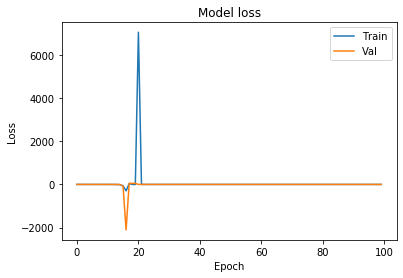

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

